In [11]:
import numpy as np
import pandas as pd

In [12]:
Sigma = pd.read_csv('output_synthetic/output_4096_9_params/bayesian_calibration_results/14_output_keys/calibration_20250916_153255/posterior_covariance.csv')
Sigma

,pat.r,pat.c,ti.CQ,rv.E_pas,rv.E_act,rv.k_pas,ra.E_act,ra.k_pas,T
0,0.000761,0.014751,-0.646827,-0.000023,-0.004392,4.558098e-06,-1.705143e-04,-0.000021,0.000638
1,0.014751,0.514015,2.229972,0.001025,-0.013850,1.205064e-04,8.069687e-04,0.000134,0.010338
2,-0.646827,2.229972,13017.858686,0.052253,-2.925798,-5.802808e-03,-2.357618e-01,0.027306,0.058249
3,-0.000023,0.001025,0.052253,0.029087,0.008318,-3.696318e-04,1.670008e-04,-0.000061,-0.000928
4,-0.004392,-0.013850,-2.925798,0.008318,0.134466,2.714528e-04,-2.377284e-03,0.000278,-0.005128
5,0.000005,0.000121,-0.005803,-0.000370,0.000271,1.623550e-05,-1.750169e-07,-0.000001,-0.000045
6,-0.000171,0.000807,-0.235762,0.000167,-0.002377,-1.750169e-07,4.990409e-03,0.000029,0.000015
7,-0.000021,0.000134,0.027306,-0.000061,0.000278,-1.444068e-06,2.856187e-05,0.000029,-0.000003
8,0.000638,0.010338,0.058249,-0.000928,-0.005128,-4.507604e-05,1.460054e-05,-0.000003,0.003873


In [15]:
import numpy as np
import matplotlib.pyplot as plt

class CorrelationPlot:
    def __init__(self, covariance_matrix):
        # If input is a DataFrame, extract labels
        if isinstance(covariance_matrix, pd.DataFrame):
            self.cov = covariance_matrix.values
            self.labels = list(covariance_matrix.columns)
        else:
            self.cov = np.array(covariance_matrix)
            self.labels = [f"Var{i+1}" for i in range(self.cov.shape[0])]

        self.corr = self._compute_correlation()

    def _compute_correlation(self):
        """Compute correlation matrix from covariance matrix."""
        stddev = np.sqrt(np.diag(self.cov))
        return self.cov / np.outer(stddev, stddev)

    def plot_heatmap(self, cmap="coolwarm", vmin=-1, vmax=1, show_values=False):
        """Plot heatmap of correlation matrix."""
        fig, ax = plt.subplots()
        cax = ax.matshow(self.corr, cmap=cmap, vmin=vmin, vmax=vmax)
        fig.colorbar(cax)

        # Axis ticks
        ax.set_xticks(range(len(self.labels)))
        ax.set_yticks(range(len(self.labels)))
        ax.set_xticklabels(self.labels, rotation=45, ha="left")
        ax.set_yticklabels(self.labels)

        # Optional annotations
        if show_values:
            for i in range(self.corr.shape[0]):
                for j in range(self.corr.shape[1]):
                    ax.text(j, i, f"{self.corr[i, j]:.2f}", va="center", ha="center", color="black")

        plt.show()


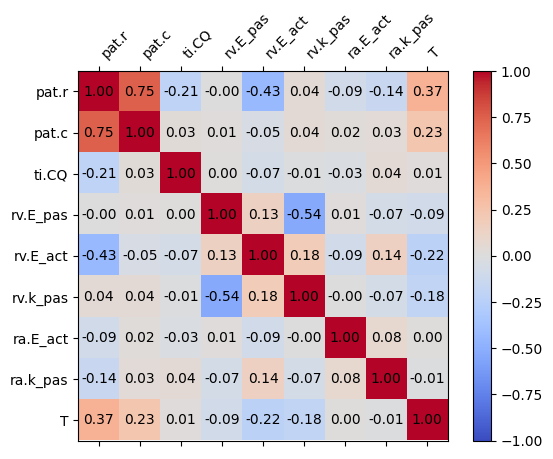

In [16]:
cp = CorrelationPlot(Sigma)
cp.plot_heatmap(show_values=True)

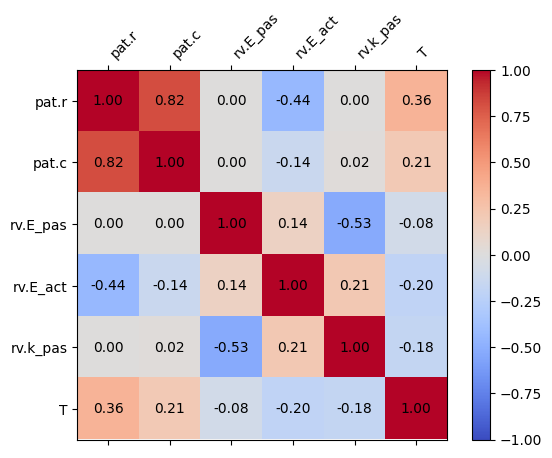

In [18]:
Sigma_6_params = pd.read_csv('output_synthetic/output_4096_6_params/bayesian_calibration_results/11_output_keys/calibration_20250818_141427/posterior_covariance.csv')
cp = CorrelationPlot(Sigma_6_params)
cp.plot_heatmap(show_values=True)